In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb
import matplotlib.pyplot as plt

# Importing the required packages
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [3]:
nums=['ㅏ','ㅑ','ㅓ','ㅕ','ㅗ','ㅛ','ㅜ','ㅠ','ㅡ','ㅣ','ㅐ','ㅒ','ㅔ','ㅖ','ㅢ','ㅟ']
j=20
for num in nums:
    path = '../data/모음/jy/%s.csv'%num
    num = pd.read_csv(path, engine='python', encoding='cp949')
    num.columns =["aX", "aY", "aZ", "gX","gY","gZ",'little','ring','middle','index','thumb']
    #num.drop(['aX','aY','aZ','gX','gY','gZ'], axis=1, inplace=True)
    data = num
    
    for k in data.columns:     #data.columns[w:] if you have w column of line description 
        data[k] = data[k].fillna(data[k].median())
    data = data.filter(['little','ring','middle','index','thumb'])
    data.insert(5,'Character',j)
    j=j+1
    #finaldata = pd.concat([finaldata, data], sort=False, ignore_index=True)
   
    print(data)
#print(num)

     little  ring  middle  index  thumb  Character
0       285   302     230    433    367         20
1       280   296     229    438    340         20
2       286   298     231    442    341         20
3       283   294     228    439    353         20
4       288   299     230    442    353         20
..      ...   ...     ...    ...    ...        ...
498     272   316     239    450    348         20
499     273   318     240    452    347         20
500     273   313     240    450    348         20
501     269   316     240    453    349         20
502     276   314     241    451    347         20

[503 rows x 6 columns]
     little  ring  middle  index  thumb  Character
0       269   280     443    470    341         21
1       263   282     444    472    346         21
2       269   288     446    471    336         21
3       270   288     440    465    339         21
4       250   274     437    455    329         21
..      ...   ...     ...    ...    ...        ...
500    

In [8]:
nums=['ㅏ','ㅑ','ㅓ','ㅕ','ㅗ','ㅛ','ㅜ','ㅠ','ㅡ','ㅣ','ㅐ','ㅒ','ㅔ','ㅖ','ㅢ','ㅟ']
j=20

finaldata_jy = pd.DataFrame(columns=(['aX', 'aY', 'aZ', 'gX','gY','gZ','index','middle','ring','little','thumb']))

for num in nums:
    path = '../data/모음/jy/%s.csv'%num
    num_jy = pd.read_csv(path, engine='python', encoding='cp949')
    num_jy.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_jy = num_jy
    
    for k in data_jy.columns:     #data.columns[w:] if you have w column of line description 
        data_jy[k] = data_jy[k].fillna(data_jy[k].median())
    data_jy = data_jy.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_jy.insert(11,'Character',j)
    j=j+1
    finaldata_jy = pd.concat([finaldata_jy,data_jy[180:]],sort=False,ignore_index = True)
    test_jy = data_jy[:149]
    #test_jy=test_jy.drop("Character", axis = 1)
    #print(test_jy)
#finaldata.isnull().any()
finaldata_jy = finaldata_jy.astype({'Character':int})
finaldata_jy

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,-0.05,-0.95,0.35,-0.55,0.12,-2.87,461,235,315,283,350,20
1,0.01,-0.96,0.34,2.75,-3.05,-5.86,461,237,306,281,348,20
2,-0.00,-0.94,0.33,2.01,-3.30,-4.88,459,239,307,279,351,20
3,-0.02,-0.93,0.33,0.49,-0.06,-1.95,462,236,303,280,344,20
4,0.00,-0.95,0.38,1.71,-3.97,-1.71,452,236,307,284,348,20
...,...,...,...,...,...,...,...,...,...,...,...,...
5231,0.38,0.79,0.47,1.16,-0.73,-2.99,448,265,397,412,358,35
5232,0.37,0.81,0.49,9.70,-8.61,9.83,447,268,397,410,360,35
5233,0.42,0.79,0.43,3.11,-2.32,-2.20,450,267,396,408,359,35
5234,0.42,0.80,0.44,1.65,-3.36,-2.75,454,264,401,410,359,35


In [9]:
test_jy

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb,Character
0,0.18,0.77,0.52,-29.11,-1.89,-23.38,409,399,257,446,359,35
1,0.23,0.83,0.45,15.81,-1.16,-11.90,412,392,255,445,356,35
2,0.19,0.86,0.54,25.57,16.11,17.58,412,394,258,443,358,35
3,0.23,0.86,0.45,8.54,-6.71,-4.82,419,396,260,446,357,35
4,0.28,0.87,0.52,-13.73,-5.92,3.48,439,397,259,447,362,35
...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.26,0.88,0.43,-3.36,-2.44,-2.93,420,397,264,452,355,35
145,0.26,0.88,0.42,2.69,-2.32,-3.54,415,397,263,451,354,35
146,0.24,0.87,0.42,0.37,-1.77,-3.72,416,398,265,457,358,35
147,0.27,0.88,0.39,12.82,0.12,-3.48,418,397,263,453,355,35


In [11]:
nums=['ㅏ','ㅑ','ㅓ','ㅕ','ㅗ','ㅛ','ㅜ','ㅠ','ㅡ','ㅣ','ㅐ','ㅒ','ㅔ','ㅖ','ㅢ','ㅟ']
j=20

finaldata_yj = pd.DataFrame(columns=(['aX', 'aY', 'aZ', 'gX','gY','gZ','index','middle','ring','little','thumb']))

for num in nums:
    path = '../data/모음/yj/%s.csv'%num
    num_yj = pd.read_csv(path, engine='python', encoding='cp949')
    num_yj.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_yj = num_yj
    
    for k in data_yj.columns:     #data.columns[w:] if you have w column of line description 
        data_yj[k] = data_yj[k].fillna(data_yj[k].median())
    data_yj = data_yj.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_yj.insert(11,'Character',j)
    j=j+1
    finaldata_yj = pd.concat([finaldata_yj,data_yj[150:]],sort=False,ignore_index = True)
    test_yj = data_yj[:149]
    test_yj= test_yj.drop("Character", axis = 1)
    #print(finaldata_yj)
#finaldata.isnull().any()
finaldata_yj = finaldata_yj.astype({'Character':int})
finaldata_yj

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0.18,-0.96,0.17,-0.61,-2.26,-3.30,446,206,263,209,355,20
1,0.18,-0.97,0.17,0.79,-2.81,-1.95,443,207,261,210,348,20
2,0.17,-0.97,0.18,0.79,-2.38,-1.59,442,197,264,209,353,20
3,0.16,-0.98,0.18,0.06,-3.42,-2.38,447,202,268,201,353,20
4,0.17,-0.97,0.18,0.18,-3.11,-2.44,443,201,263,210,353,20
...,...,...,...,...,...,...,...,...,...,...,...,...
5789,0.50,0.81,0.30,3.91,-2.87,-1.71,437,208,282,358,364,35
5790,0.52,0.80,0.27,0.55,-5.86,-1.53,445,209,282,359,365,35
5791,0.56,0.82,0.26,0.24,-4.09,-0.49,438,209,281,356,366,35
5792,0.57,0.82,0.25,0.92,-4.64,-2.38,445,207,283,359,367,35


In [12]:
test_yj

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,0.42,0.89,0.19,-5.68,-10.68,-8.79,380,276,206,439,360
1,0.37,0.88,0.28,2.93,-1.40,-6.41,382,275,200,447,358
2,0.38,0.94,0.27,-2.50,-1.77,-2.14,384,280,198,444,362
3,0.39,0.88,0.30,-0.06,-1.16,-3.36,381,277,201,442,360
4,0.37,0.95,0.29,2.44,1.46,1.34,378,277,205,443,359
...,...,...,...,...,...,...,...,...,...,...,...
144,0.55,0.80,0.26,0.98,-4.27,-2.50,371,279,218,442,362
145,0.55,0.79,0.26,-0.61,-3.54,-3.05,371,282,206,436,356
146,0.54,0.79,0.27,-3.54,-2.50,-0.73,368,278,204,441,359
147,0.55,0.80,0.26,0.31,-3.85,-1.95,368,276,205,436,359


In [14]:
nums=['ㅏ','ㅑ','ㅓ','ㅕ','ㅗ','ㅛ','ㅜ','ㅠ','ㅡ','ㅣ','ㅐ','ㅒ','ㅔ','ㅖ','ㅢ','ㅟ']
j=20

finaldata_nh = pd.DataFrame(columns=(['aX', 'aY', 'aZ', 'gX','gY','gZ','index','middle','ring','little','thumb']))

for num in nums:
    path = '../data/모음/nh/%s.csv'%num
    num_nh = pd.read_csv(path, engine='python', encoding='cp949')
    num_nh.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data_nh = num_nh
    
    for k in data_nh.columns:     #data.columns[w:] if you have w column of line description 
        data_nh[k] = data_nh[k].fillna(data_nh[k].median())
    data_nh = data_nh.filter(['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb'])
    data_nh.insert(11,'Character',j)
    j=j+1
    
    finaldata_nh = pd.concat([finaldata_nh,data_nh[150:]],sort=False,ignore_index = True)
    test_nh = data_nh[:149]
    test_nh= test_nh.drop("Character", axis = 1)
    
    #print(finaldata_nh)
#finaldata.isnull().any()

finaldata_nh = finaldata_nh.astype({'Character':int})
finaldata_nh

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0.09,-0.99,0.13,-2.75,-5.37,-5.00,449,189,222,206,298,20
1,0.08,-0.99,0.12,-0.49,-1.65,-4.03,444,192,220,203,299,20
2,0.09,-0.99,0.13,2.81,-2.08,-0.85,448,188,221,206,298,20
3,0.08,-0.99,0.13,6.77,-1.16,0.37,445,196,224,206,296,20
4,0.04,-0.98,0.19,7.32,-0.31,1.46,452,192,220,205,296,20
...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.34,0.88,0.31,-0.49,-1.28,2.93,457,241,300,373,312,35
5996,0.33,0.88,0.32,3.54,-3.11,-3.78,452,238,299,371,309,35
5997,0.32,0.90,0.32,1.83,-2.56,-1.28,448,240,300,370,309,35
5998,0.33,0.89,0.29,2.32,-2.62,-2.50,450,240,300,374,305,35


In [15]:
test_nh

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,0.35,0.90,0.20,-6.35,0.92,-3.78,379,298,234,463,311
1,0.42,0.88,0.15,-3.30,-10.44,-0.79,382,303,235,453,312
2,0.45,0.89,0.12,3.66,-7.57,-5.86,373,300,224,458,310
3,0.42,0.89,0.15,1.28,-0.85,-4.33,388,292,230,457,310
4,0.41,0.89,0.14,2.20,-1.77,-4.21,392,297,236,461,310
...,...,...,...,...,...,...,...,...,...,...,...
144,0.45,0.89,0.15,1.22,-1.89,-2.62,386,305,234,460,331
145,0.46,0.88,0.15,-0.92,-3.97,-3.05,387,307,232,455,332
146,0.46,0.87,0.14,-1.22,-4.39,-1.53,388,303,236,459,332
147,0.46,0.89,0.14,-2.01,-0.98,-3.85,385,302,235,462,333


In [16]:
finaldata = pd.concat([finaldata_jy,finaldata_nh,finaldata_yj],sort=False,ignore_index = True)
finaldata = finaldata.astype({'Character':int})
finaldata

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,-0.05,-0.95,0.35,-0.55,0.12,-2.87,461,235,315,283,350,20
1,0.01,-0.96,0.34,2.75,-3.05,-5.86,461,237,306,281,348,20
2,-0.00,-0.94,0.33,2.01,-3.30,-4.88,459,239,307,279,351,20
3,-0.02,-0.93,0.33,0.49,-0.06,-1.95,462,236,303,280,344,20
4,0.00,-0.95,0.38,1.71,-3.97,-1.71,452,236,307,284,348,20
...,...,...,...,...,...,...,...,...,...,...,...,...
17025,0.50,0.81,0.30,3.91,-2.87,-1.71,437,208,282,358,364,35
17026,0.52,0.80,0.27,0.55,-5.86,-1.53,445,209,282,359,365,35
17027,0.56,0.82,0.26,0.24,-4.09,-0.49,438,209,281,356,366,35
17028,0.57,0.82,0.25,0.92,-4.64,-2.38,445,207,283,359,367,35


In [17]:
149*3

447

In [19]:
import random
temp=[]
for i in range(447):
    temp.append(random.randint(20, 36))

In [20]:
temp = np.array(temp)

In [22]:
test = pd.concat([test_jy,test_nh,test_yj],sort=False,ignore_index = True)
test["Character"] = temp

In [23]:
test

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb,Character
0,0.18,0.77,0.52,-29.11,-1.89,-23.38,409,399,257,446,359,26
1,0.23,0.83,0.45,15.81,-1.16,-11.90,412,392,255,445,356,29
2,0.19,0.86,0.54,25.57,16.11,17.58,412,394,258,443,358,28
3,0.23,0.86,0.45,8.54,-6.71,-4.82,419,396,260,446,357,36
4,0.28,0.87,0.52,-13.73,-5.92,3.48,439,397,259,447,362,20
...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.55,0.80,0.26,0.98,-4.27,-2.50,371,279,218,442,362,33
443,0.55,0.79,0.26,-0.61,-3.54,-3.05,371,282,206,436,356,23
444,0.54,0.79,0.27,-3.54,-2.50,-0.73,368,278,204,441,359,20
445,0.55,0.80,0.26,0.31,-3.85,-1.95,368,276,205,436,359,32


In [24]:
test = test.drop("Character",axis = 1)
test

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,0.18,0.77,0.52,-29.11,-1.89,-23.38,409,399,257,446,359
1,0.23,0.83,0.45,15.81,-1.16,-11.90,412,392,255,445,356
2,0.19,0.86,0.54,25.57,16.11,17.58,412,394,258,443,358
3,0.23,0.86,0.45,8.54,-6.71,-4.82,419,396,260,446,357
4,0.28,0.87,0.52,-13.73,-5.92,3.48,439,397,259,447,362
...,...,...,...,...,...,...,...,...,...,...,...
442,0.55,0.80,0.26,0.98,-4.27,-2.50,371,279,218,442,362
443,0.55,0.79,0.26,-0.61,-3.54,-3.05,371,282,206,436,356
444,0.54,0.79,0.27,-3.54,-2.50,-0.73,368,278,204,441,359
445,0.55,0.80,0.26,0.31,-3.85,-1.95,368,276,205,436,359


In [140]:
import random
test = pd.concat([test_jy,test_nh,test_yj],sort=False,ignore_index = True)
#test.insert(11,'Character',number)
df = pd.DataFrame(columns=['idx', 'number'])
for idx in range(0, 447):
    number = random.randint(0, 14)
    df = df.append(pd.DataFrame([[idx, number]], columns=['idx', 'number']), ignore_index=True)
df.set_index('idx', inplace=True)
#print df
#test.insert(11,'Character',number)
#test


AttributeError: 'DataFrame' object has no attribute 'concat'

In [34]:
x = pd.concat([finaldata,test],sort=False, ignore_index=True)
x = finaldata.drop("Character", axis = 1)
y = finaldata["Character"].copy()

In [35]:
x

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
0,-0.05,-0.95,0.35,-0.55,0.12,-2.87,461,235,315,283,350
1,0.01,-0.96,0.34,2.75,-3.05,-5.86,461,237,306,281,348
2,-0.00,-0.94,0.33,2.01,-3.30,-4.88,459,239,307,279,351
3,-0.02,-0.93,0.33,0.49,-0.06,-1.95,462,236,303,280,344
4,0.00,-0.95,0.38,1.71,-3.97,-1.71,452,236,307,284,348
...,...,...,...,...,...,...,...,...,...,...,...
17025,0.50,0.81,0.30,3.91,-2.87,-1.71,437,208,282,358,364
17026,0.52,0.80,0.27,0.55,-5.86,-1.53,445,209,282,359,365
17027,0.56,0.82,0.26,0.24,-4.09,-0.49,438,209,281,356,366
17028,0.57,0.82,0.25,0.92,-4.64,-2.38,445,207,283,359,367


In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

clf = ExtraTreesClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, shuffle=True, stratify=y, random_state=42)

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

cross_val_score_array1 = cross_val_score(clf, x, y, cv=10, scoring="accuracy")
print(cross_val_score_array1)
print("acc/t", np.mean(cross_val_score_array1))
print("acc-stdev/t", cross_val_score_array1.std())

[1.         0.9994128  1.         0.997064   0.9976512  1.
 0.98179683 1.         1.         0.99588961]
acc/t 0.9971814445096887
acc-stdev/t 0.00532249874039914


In [38]:
clf.feature_importances_

NotFittedError: This ExtraTreesClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [39]:
pd.Series(y).value_counts()

24    1211
30    1117
31    1083
23    1077
28    1066
27    1053
32    1052
29    1052
26    1048
34    1046
35    1043
22    1042
20    1038
21    1038
33    1032
25    1032
Name: Character, dtype: int64

In [40]:
pd.Series(y_valid).value_counts()

24    121
30    112
23    108
31    108
28    107
26    105
27    105
29    105
32    105
34    105
20    104
21    104
22    104
35    104
25    103
33    103
Name: Character, dtype: int64

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

clf = ExtraTreesClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, shuffle=True, stratify=y, random_state=42)

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

cross_val_score_array1 = cross_val_score(clf, x, y, cv=10, scoring="accuracy")
print(cross_val_score_array1)
print("acc/t", np.mean(cross_val_score_array1))
print("acc-stdev/t", cross_val_score_array1.std())

[1.         0.9994128  1.         0.997064   0.9976512  1.
 0.98179683 1.         1.         0.99588961]
acc/t 0.9971814445096887
acc-stdev/t 0.00532249874039914


In [44]:
clf.fit(x_train, y_train)
pred = clf.predict(x_valid)

In [45]:
pred = clf.predict(x_valid)

In [46]:
clf

ExtraTreesClassifier(n_estimators=3000, n_jobs=-1, random_state=42)

In [47]:
x_valid

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
14373,0.92,-0.36,-0.06,-1.53,-1.22,-0.73,457,216,291,231,342
3915,-0.15,-0.98,-0.11,1.34,-8.30,-6.71,453,418,293,420,358
1244,0.68,-0.75,0.10,5.00,-5.68,-2.01,469,427,316,254,351
12868,0.17,-0.96,-0.19,3.11,-2.75,-2.93,443,205,287,221,376
7297,-0.13,-0.96,0.23,1.89,-2.44,1.95,464,394,272,298,305
...,...,...,...,...,...,...,...,...,...,...,...
15102,-0.14,-0.97,0.19,0.49,-2.14,-2.99,453,210,251,415,366
6754,0.16,-0.99,0.12,-0.67,-2.44,-2.26,450,213,249,246,313
6109,0.95,-0.30,0.10,1.83,-1.65,-3.11,452,216,266,262,323
8077,0.34,0.88,0.35,1.53,-2.44,-3.60,456,405,259,283,321


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

          20       1.00      1.00      1.00       104
          21       1.00      1.00      1.00       104
          22       1.00      1.00      1.00       104
          23       1.00      1.00      1.00       108
          24       1.00      1.00      1.00       121
          25       1.00      1.00      1.00       103
          26       1.00      1.00      1.00       105
          27       1.00      1.00      1.00       105
          28       1.00      1.00      1.00       107
          29       1.00      1.00      1.00       105
          30       1.00      1.00      1.00       112
          31       1.00      1.00      1.00       108
          32       1.00      1.00      1.00       105
          33       1.00      1.00      1.00       103
          34       1.00      1.00      1.00       105
          35       1.00      1.00      1.00       104

    accuracy                           1.00      1703
   macro avg       1.00   

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, pred))

1.0


In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(clf, x_train, y_train, cv=10)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[ 934,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,  933,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,  938,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,  968,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1090,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  929,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  943,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  948,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  959,    0,    0,
           0,    0,   

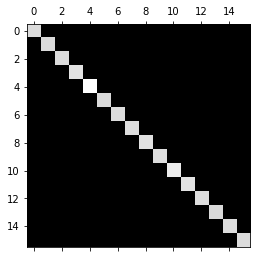

In [51]:
import matplotlib.pyplot as plt
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
#표준편차